In [13]:
from catenets.datasets import load
from src.iterpretability.synthetic_simulate import SyntheticSimulatorLinear, SyntheticSimulatorLinearCorrelations, SyntheticSimulatorLinearPairwise, SyntheticSimulatorNonLinear, SyntheticSimulatorModulatedNonLinear
from src.iterpretability.datasets.data_loader import load
from src.iterpretability.utils import attribution_accuracy
import seaborn as sns
import pickle
import pandas as pd 
from functools import reduce

import numpy as np
from catenets.models.torch import TLearner, SLearner, TARNet, SNet
from src.iterpretability.explain import Explainer
from src.iterpretability.synthetic_experiment import PredictiveSensitivity
from src.iterpretability.utils import (
    attribution_accuracy,
    compute_cate_metrics,
    dataframe_line_plot,
)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [14]:
news_dataset = pickle.load(open('src/iterpretability/datasets/news/' + 'news_full_dataset.p', 'rb'))

In [15]:
def normalize_data(X):
    X_normalized = (X - np.min(X, axis=0)) / (
            np.max(X, axis=0) - np.min(X, axis=0))

    return X_normalized

In [16]:
from sklearn.decomposition import PCA

news_dataset = pickle.load(open('src/iterpretability/datasets/news/' + 'news_full_dataset.p', 'rb'))
pca = PCA(50, svd_solver="randomized")
news_dataset = pca.fit_transform(news_dataset['data'])


news_dataset = normalize_data(news_dataset)

In [28]:
X_raw_train, X_raw_test = load('twins', train_ratio=0.9)
sim = SyntheticSimulatorModulatedNonLinear(X_raw_train, num_important_features=4, seed=66, non_linearity_scale=1)
predictive_scale = 1

In [29]:
X_train, W_train, Y_train, po0_train, po1_train, propensity_train = sim.simulate_dataset(X_raw_train,
                                                                                         predictive_scale=1,
                                                                                         binary_outcome=False)

[0.5 0.5 0.5 ... 0.5 0.5 0.5]


In [30]:
X_raw_train.shape

(10260, 39)

<AxesSubplot:ylabel='Density'>

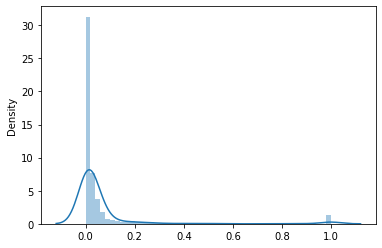

In [31]:
sns.distplot(np.abs(np.corrcoef(X_raw_train, rowvar=False)).flatten())

<AxesSubplot:ylabel='Density'>

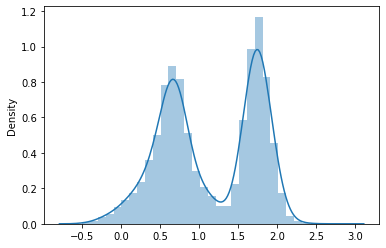

In [32]:
sns.distplot(Y_train)

<AxesSubplot:ylabel='Density'>

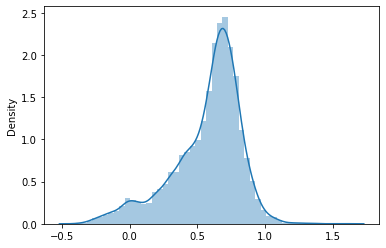

In [33]:
sns.distplot(po0_train)

<AxesSubplot:ylabel='Density'>

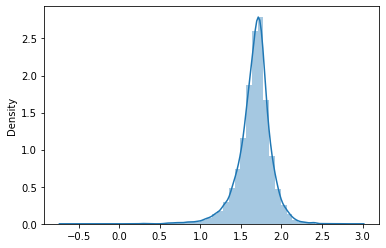

In [15]:
sns.distplot(po1)

<AxesSubplot:ylabel='Density'>

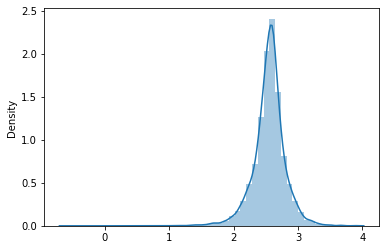

In [16]:
sns.distplot(po1-po0)

<AxesSubplot:ylabel='Density'>

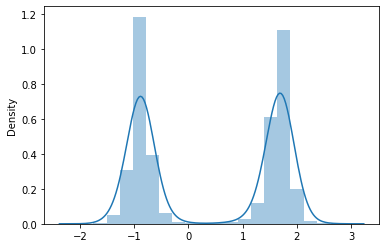

In [17]:
sns.distplot(Y_train)

In [ ]:
learner = TLearner(
    X_train.shape[1], binary_y=(len(np.unique(Y_train)) == 2), n_iter=1000
)
learner.fit(X=X_train, y=Y_train, w=W_train)
explainer = Explainer(learner, feature_names=list(range(X_train.shape[1])))

/Users/ibica/anaconda3/envs/medkit/lib/python3.6/site-packages/captum/attr/_core/deep_lift.py:323: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  after the attribution is finished"""
/Users/ibica/anaconda3/envs/medkit/lib/python3.6/site-packages/captum/attr/_core/lime.py:1102: UserWarning: You are providing multiple inputs for Lime / Kernel SHAP attributions. This trains a separate interpretable model for each example, which can be time consuming. It is recommended to compute attributions for one example at a time.
  "You are providing multiple inputs for Lime / Kernel SHAP "


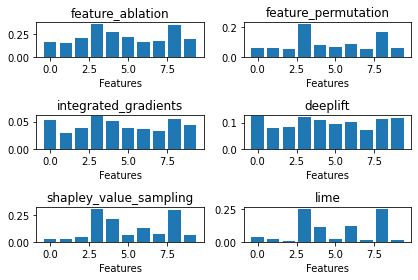

In [14]:
explainer.plot(X_test[:100])

In [15]:
all_explanations = explainer.explain(X_test[:100])

/Users/ibica/anaconda3/envs/medkit/lib/python3.6/site-packages/captum/attr/_core/deep_lift.py:323: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  after the attribution is finished"""
/Users/ibica/anaconda3/envs/medkit/lib/python3.6/site-packages/captum/attr/_core/lime.py:1102: UserWarning: You are providing multiple inputs for Lime / Kernel SHAP attributions. This trains a separate interpretable model for each example, which can be time consuming. It is recommended to compute attributions for one example at a time.
  "You are providing multiple inputs for Lime / Kernel SHAP "


In [ ]:
for name in all_explanations.keys():
    print (name)
    print (attribution_accuracy(range(0, 6), np.abs(all_explanations[name])))

feature_ablation
0.675
feature_permutation
0.6466666666666666
integrated_gradients
0.615
deeplift
0.6316666666666667
shapley_value_sampling
0.7683333333333333
lime
0.7316666666666667


In [12]:
learners = {"TLearner": TLearner(X_train.shape[1], binary_y=(len(np.unique(Y_train)) == 2), n_iter=1000),
           "SLearner": SLearner(X_train.shape[1], binary_y=(len(np.unique(Y_train)) == 2), n_iter=1000),}

explainer_list = [ "feature_ablation",
            "feature_permutation",
            "integrated_gradients",
            "shapley_value_sampling",
            "lime"]

In [13]:
learner_explainers = {}
learner_explanations = {}

limit = 100

for name in learners:
    print (name)
    learners[name].fit(X=X_train, y=Y_train.astype(np.int32), w=W_train)
    



TLearner
SLearner


TLearner


/Users/ibica/anaconda3/envs/medkit/lib/python3.6/site-packages/captum/attr/_core/lime.py:1102: UserWarning: You are providing multiple inputs for Lime / Kernel SHAP attributions. This trains a separate interpretable model for each example, which can be time consuming. It is recommended to compute attributions for one example at a time.
  "You are providing multiple inputs for Lime / Kernel SHAP "
/Users/ibica/anaconda3/envs/medkit/lib/python3.6/site-packages/captum/attr/_core/lime.py:1102: UserWarning: You are providing multiple inputs for Lime / Kernel SHAP attributions. This trains a separate interpretable model for each example, which can be time consuming. It is recommended to compute attributions for one example at a time.
  "You are providing multiple inputs for Lime / Kernel SHAP "


SLearner


/Users/ibica/anaconda3/envs/medkit/lib/python3.6/site-packages/captum/attr/_core/lime.py:1102: UserWarning: You are providing multiple inputs for Lime / Kernel SHAP attributions. This trains a separate interpretable model for each example, which can be time consuming. It is recommended to compute attributions for one example at a time.
  "You are providing multiple inputs for Lime / Kernel SHAP "
/Users/ibica/anaconda3/envs/medkit/lib/python3.6/site-packages/captum/attr/_core/lime.py:1102: UserWarning: You are providing multiple inputs for Lime / Kernel SHAP attributions. This trains a separate interpretable model for each example, which can be time consuming. It is recommended to compute attributions for one example at a time.
  "You are providing multiple inputs for Lime / Kernel SHAP "


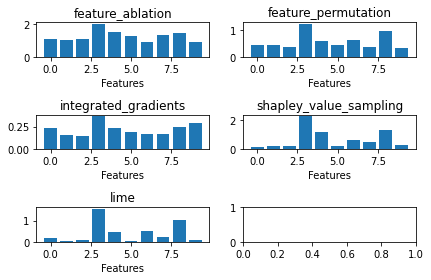

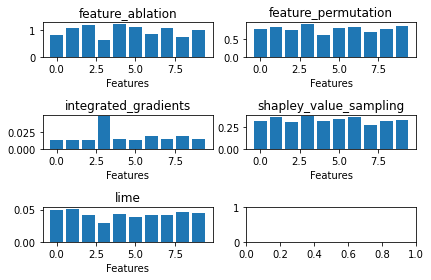

In [14]:
for name in learners:
    print (name)
    explainer = Explainer(
        learners[name],
        feature_names=list(range(X_train.shape[1])),
        explainer_list=explainer_list,
    )
    learner_explainers[name] = explainer
    explainer.plot(X_test[:100])
    learner_explanations[name] = learner_explainers[name].explain(X_test[:limit])


In [15]:
explainability_data = []
all_important_features = sim.get_all_important_features()
pred_features = sim.get_predictive_features()
prog_features = sim.get_prognostic_features()

cate_test = sim.te(X_test)

for explainer_name in explainer_list:
    for learner_name in learners:
        attribution_est = np.abs(learner_explanations[learner_name][explainer_name])
        acc_scores_all_features = attribution_accuracy(
            all_important_features, attribution_est
        )
        acc_scores_predictive_features = attribution_accuracy(pred_features, attribution_est)
        acc_scores_prog_features = attribution_accuracy(prog_features, attribution_est)
        _, mu0_pred, mu1_pred = learners[learner_name].predict(X=X_test, return_po=True)

        pehe_test, factual_rmse_test = compute_cate_metrics(cate_true=cate_test, y_true=Y_test,
                                                            w_true=W_test,
                                                            mu0_pred=mu0_pred, mu1_pred=mu1_pred)

        explainability_data.append(
            [
                predictive_scale,
                learner_name,
                explainer_name,
                acc_scores_all_features,
                acc_scores_predictive_features,
                acc_scores_prog_features,
                pehe_test,
                factual_rmse_test,
                np.mean(cate_test),
                np.var(cate_test),
                pehe_test /  np.sqrt(np.var(cate_test))
            ]
        )


In [17]:
metrics_df = pd.DataFrame(
            explainability_data,
            columns=[
                "Predictive Scale",
                "Learner",
                "Explainer",
                "All features ACC",
                "Pred features ACC",
                "Prog features ACC",
                "PEHE",
                "Factual RMSE",
                "CATE true mean",
                "CATE true var",
                "Normalized PEHE",
            ],

        )

In [18]:
metrics_df

,Predictive Scale,Learner,Explainer,All features ACC,Pred features ACC,Prog features ACC,PEHE,Factual RMSE,CATE true mean,CATE true var,Normalized PEHE
0,10,TLearner,feature_ablation,0.651667,0.5400,0.19,6.263867,0.917086,0.862373,0.010189,62.056017
1,10,SLearner,feature_ablation,0.563333,0.2950,0.23,1.278671,5.391103,0.862373,0.010189,12.667775
2,10,TLearner,feature_permutation,0.678333,0.6275,0.02,6.266923,0.910176,0.862373,0.010189,62.086292
3,10,SLearner,feature_permutation,0.596667,0.4075,0.24,1.239585,5.405595,0.862373,0.010189,12.280544
4,10,TLearner,integrated_gradients,0.628333,0.4850,0.08,6.265527,0.909008,0.862373,0.010189,62.072465
5,10,SLearner,integrated_gradients,0.638333,0.5300,0.02,1.277850,5.421293,0.862373,0.010189,12.659641
6,10,TLearner,shapley_value_sampling,0.835000,0.9550,0.00,6.263957,0.913699,0.862373,0.010189,62.056913
7,10,SLearner,shapley_value_sampling,0.538333,0.4325,0.07,1.248976,5.406103,0.862373,0.010189,12.373582
8,10,TLearner,lime,0.830000,1.0000,0.00,6.264225,0.897304,0.862373,0.010189,62.059568
9,10,SLearner,lime,0.581667,0.3475,0.27,1.228426,5.362647,0.862373,0.010189,12.169991
